__Each year since 2011, Stack Overflow has asked developers about their favorite technologies, coding habits, and work preferences, as well as how they learn, share, and level up.__

__Let's go through the survey results and see if we can pick up trends over the years.__

In [1]:

import Helper as hlpr
import pandas as pd
from collections import defaultdict
%matplotlib inline

# What is the most dominant and widely used programming language/technology over the years ?

For our first question, what is the most dominant and widely used programming language/technology over the years ?
Notice that I didn't take into consideration the dataset of 2011 and 2012 as the question used for that purpose is "Which languages are you proficient in?" while in later datasets the question used is "Which of the following languages or technologies have you used significantly in the past year? 

While the two are similar, I chose to treat them differently as they hold a bit of a different meaning.

In [2]:
#Reading the datasets
#Note: ISO-8859-1 encoding was used as it caused some issues while reading data in datasets older then < 2017
data_2013 = hlpr.read_data('./2013 Stack Overflow Survey Responses/2013 Stack Overflow Survey Responses.csv','ISO-8859-1')
data_2014 = hlpr.read_data('./2014 Stack Overflow Survey Responses/2014 Stack Overflow Survey Responses.csv','ISO-8859-1')
data_2015 = hlpr.read_data('./2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.CSV','ISO-8859-1')
data_2016 = hlpr.read_data('./2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.CSV','ISO-8859-1')
data_2017 = hlpr.read_data('./developer_survey_2017/survey_results_public.CSV','ISO-8859-1')
data_2018 = hlpr.read_data('./developer_survey_2018/survey_results_public.CSV','ISO-8859-1')
data_2019 = hlpr.read_data('./developer_survey_2019/survey_results_public.CSV','ISO-8859-1')

C:\Users\Sheri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
C:\Users\Sheri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
C:\Users\Sheri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [3]:
#A quick look at each dataset in terms of dimensions and columns
#2013 Survey results data set:
print(data_2013.columns)
data_2013.shape

Index(['What Country or Region do you live in?',
       'Which US State or Territory do you live in?', 'How old are you?',
       'How many years of IT/Programming experience do you have?',
       'How would you best describe the industry you currently work in?',
       'How many people work for your company?',
       'Which of the following best describes your occupation?',
       'Including yourself, how many developers are employed at your company?',
       'How large is the team that you work on?',
       'What other departments / roles do you interact with regularly?',
       ...
       'Unnamed: 118', 'Unnamed: 119', 'Unnamed: 120', 'Unnamed: 121',
       'What advertisers do you remember seeing on Stack Overflow?',
       'What is your current Stack Overflow reputation?',
       'How do you use Stack Overflow?', 'Unnamed: 125', 'Unnamed: 126',
       'Unnamed: 127'],
      dtype='object', length=128)


(9743, 128)

In [4]:
#2014 Survey results data set:
print(data_2014.columns)
data_2014.shape

Index(['What Country do you live in?', 'Unnamed: 1',
       'Which US State or Territory do you live in?', 'How old are you?',
       'What is your gender?',
       'How many years of IT/Programming experience do you have?',
       'Which of the following best describes your occupation?',
       'Including bonus, what is your annual compensation in USD?',
       'How would you best describe the industry you currently work in?',
       'How many developers are employed at your company?',
       ...
       'Did you participate in the Apptivate contest?',
       'What advertisers do you remember seeing on Stack Overflow?',
       'What is your current Stack Overflow reputation?',
       'How do you use Stack Overflow?', 'Unnamed: 114', 'Unnamed: 115',
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118',
       'How often do you find solutions to your programming problems on Stack Overflow without asking a new question?'],
      dtype='object', length=120)


(7644, 120)

In [5]:
#2015 Survey results data set:
print(data_2015.columns)
data_2015.shape

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Select all that apply',
       'Unnamed: 9',
       ...
       'Unnamed: 212', 'Unnamed: 213', 'Select all that apply.7',
       'Unnamed: 215', 'Unnamed: 216', 'Unnamed: 217', 'Unnamed: 218',
       'Unnamed: 219', 'Unnamed: 220', 'Unnamed: 221'],
      dtype='object', length=222)


(26087, 222)

In [6]:
#2016 Survey results data set:
print(data_2016.columns)
data_2016.shape

Index(['Unnamed: 0', 'collector', 'country', 'un_subregion', 'so_region',
       'age_range', 'age_midpoint', 'gender', 'self_identification',
       'occupation', 'occupation_group', 'experience_range',
       'experience_midpoint', 'salary_range', 'salary_midpoint',
       'big_mac_index', 'tech_do', 'tech_want', 'aliens',
       'programming_ability', 'employment_status', 'industry',
       'company_size_range', 'team_size_range', 'women_on_team', 'remote',
       'job_satisfaction', 'job_discovery', 'dev_environment',
       'commit_frequency', 'hobby', 'dogs_vs_cats', 'desktop_os',
       'unit_testing', 'rep_range', 'visit_frequency', 'why_learn_new_tech',
       'education', 'open_to_new_job', 'new_job_value', 'job_search_annoyance',
       'interview_likelihood', 'how_to_improve_interview_process',
       'star_wars_vs_star_trek', 'agree_tech', 'agree_notice',
       'agree_problemsolving', 'agree_diversity', 'agree_adblocker',
       'agree_alcohol', 'agree_loveboss', 'agree_n

(56030, 66)

In [7]:
#2017 Survey results data set:
print(data_2017.columns)
data_2017.shape

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)


(51392, 154)

In [8]:
#2018 Survey results data set:
print(data_2018.columns)
data_2018.shape

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)


(98855, 129)

In [9]:
#2019 Survey results data set:
print(data_2019.columns)
data_2019.shape

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

(88883, 85)

# Preparing the data
## 2013 dataset
After checking the 2013 dataset, the structure is all wrong. It appears to have been some kind of a label then a few cells with checkboxes or something similar which results in incorrect headings and a messed up structure that needs repairing.
Note that the first row is useless and each column represents a language or technology on it's own.

In [10]:
#A closer look on the unprepared dataset of 2013 columns
cols_2013 = data_2013.columns.tolist()
print(cols_2013)

pl_2013 = data_2013[[
        'Which of the following languages or technologies have you used significantly in the past year?',
        'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 
        'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 
        'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 
        'Unnamed: 69']]
pl_2013_want = data_2013[['Which technologies are you excited about?',
                          'Unnamed: 71',
                          'Unnamed: 72',
                          'Unnamed: 73',
                          'Unnamed: 74',
                          'Unnamed: 75',
                          'Unnamed: 76',
                          'Unnamed: 77',
                          'Unnamed: 78',
                          'Unnamed: 79',
                          'Unnamed: 80']]

['What Country or Region do you live in?', 'Which US State or Territory do you live in?', 'How old are you?', 'How many years of IT/Programming experience do you have?', 'How would you best describe the industry you currently work in?', 'How many people work for your company?', 'Which of the following best describes your occupation?', 'Including yourself, how many developers are employed at your company?', 'How large is the team that you work on?', 'What other departments / roles do you interact with regularly?', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'If your company has a native mobile app, what platforms do you support?', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'If you make a software product, how does your company make money? (You can choose more than one)', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnam

In [11]:
# Drop first row as it's useless
pl_2013 = pl_2013[1:]
pl_2013_want = pl_2013_want[1:]

#Rename every row to the language it represents
new_headers_2013 = hlpr.column_rename_firstvalue(pl_2013)
pl_2013.columns = new_headers_2013

#Get the count
pl_2013_counter = {}
pl_2013_counter.fromkeys(new_headers_2013)

for col in pl_2013:
    pl_2013_counter[col]=pl_2013[col].value_counts()[0]

df_2013 = pd.DataFrame(list(pl_2013_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2013.reset_index(drop=True,inplace=True)
display(df_2013)

,Programming Language,Users Count
0,JavaScript,4735
1,SQL,4593
2,jQuery,4109
3,C#,3027
4,Java,3020
5,PHP,2324
6,Python,1880
7,C++,1696
8,C,1436
9,Objective-C,955


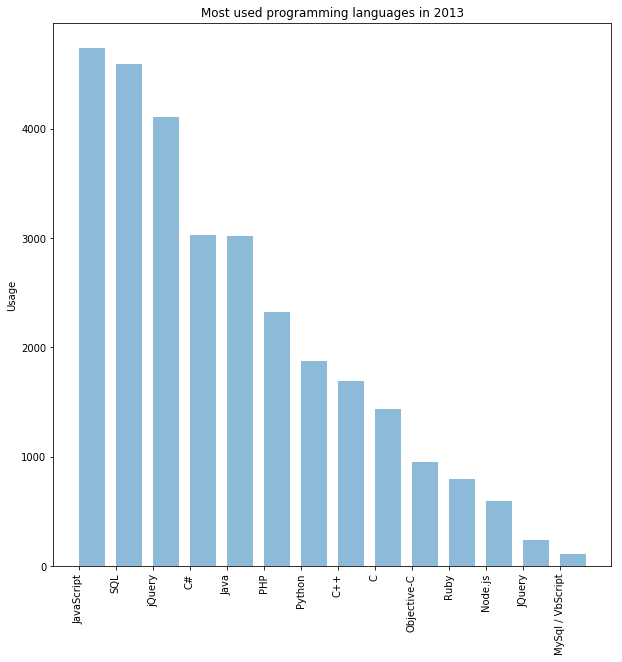

In [12]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2013['Programming Language'], df_2013['Users Count'],
                              90,'Usage','Most used programming languages in 2013',10,10)

## 2014 dataset
This one is exactly the same as the 2013 dataset in terms of structure and cleaning.

,Programming Language,Users Count
0,JavaScript,3783
1,SQL,3467
2,Java,2479
3,C#,2378
4,PHP,1710
5,Python,1473
6,C++,1418
7,C,1174
8,Objective-C,675
9,Node.js,641


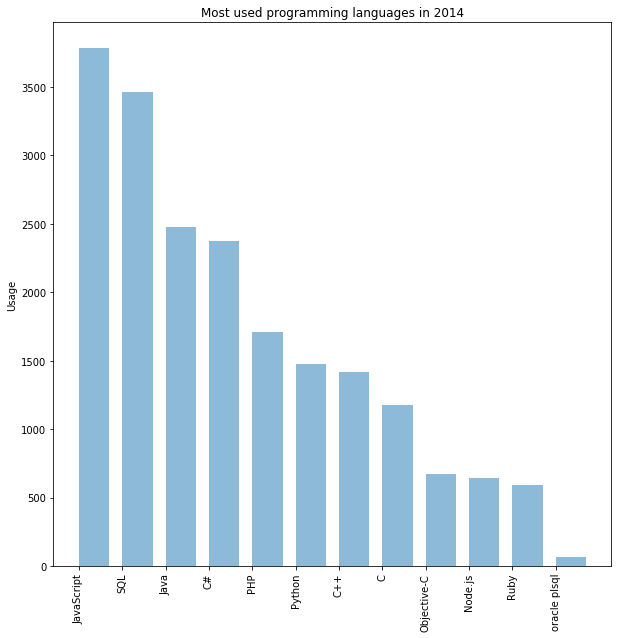

In [13]:
#A closer look on the unprepared dataset of 2014 columns
cols_2014 = data_2014.columns.tolist()

pl_2014 = data_2014[[
        'Which of the following languages or technologies have you used significantly in the past year?',
        'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47',
        'Unnamed: 48','Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52',
        'Unnamed: 53',]]

pl_2014 = pl_2014[1:]

#Rename every row to the language it represents
new_headers_2014 = hlpr.column_rename_firstvalue(pl_2014)
pl_2014.columns = new_headers_2014

#Get the count
pl_2014_counter = {}
pl_2014_counter.fromkeys(new_headers_2014)

for col in pl_2014:
    pl_2014_counter[col]=pl_2014[col].value_counts()[0]

df_2014 = pd.DataFrame(list(pl_2014_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2014.reset_index(drop=True,inplace=True)
display(df_2014)
 
#Plot the data
hlpr.plot_barchart_dictionary(df_2014['Programming Language'], df_2014['Users Count'],
                              90,'Usage','Most used programming languages in 2014',10,10)


## 2015 dataset
This time, the fist row in 2015 is useless so, a different type of preparation is required.

In [14]:
#The case is different with the 2015 dataset, the first row is completely useless.
data_2015.columns = data_2015.iloc[0]

#Rename the headers
pl_2015 = data_2015[['Current Lang & Tech: Android', 'Current Lang & Tech: Arduino',
                     'Current Lang & Tech: AngularJS','Current Lang & Tech: C',
                     'Current Lang & Tech: C++','Current Lang & Tech: C++11',
                     'Current Lang & Tech: C#','Current Lang & Tech: Cassandra',
                     'Current Lang & Tech: CoffeeScript','Current Lang & Tech: Cordova',
                     'Current Lang & Tech: Clojure','Current Lang & Tech: Cloud',
                     'Current Lang & Tech: Dart','Current Lang & Tech: F#','Current Lang & Tech: Go',
                     'Current Lang & Tech: Hadoop','Current Lang & Tech: Haskell','Current Lang & Tech: iOS','Current Lang & Tech: Java',
                     'Current Lang & Tech: JavaScript',
                     'Current Lang & Tech: LAMP',
                     'Current Lang & Tech: Matlab',
                     'Current Lang & Tech: MongoDB',
                     'Current Lang & Tech: Node.js',
                     'Current Lang & Tech: Objective-C',
                     'Current Lang & Tech: Perl',
                     'Current Lang & Tech: PHP',
                     'Current Lang & Tech: Python',
                     'Current Lang & Tech: R',
                     'Current Lang & Tech: Redis',
                     'Current Lang & Tech: Ruby',
                     'Current Lang & Tech: Rust',
                     'Current Lang & Tech: Salesforce',
                     'Current Lang & Tech: Scala',
                     'Current Lang & Tech: Sharepoint',
                     'Current Lang & Tech: Spark',
                     'Current Lang & Tech: SQL',
                     'Current Lang & Tech: SQL Server',
                     'Current Lang & Tech: Swift',
                     'Current Lang & Tech: Visual Basic',
                     'Current Lang & Tech: Windows Phone',
                     'Current Lang & Tech: Wordpress',
                     'Current Lang & Tech: Write-In',]]
pl_2015 = pl_2015[1:]
new_headers_2015 = hlpr.column_rename_firstvalue(pl_2015)
pl_2015.columns = new_headers_2015

In [15]:
#Get the count
pl_2015_counter = {}
pl_2015_counter.fromkeys(new_headers_2015)

for col in pl_2015:
    pl_2015_counter[col]=pl_2015[col].value_counts()[0]
    
df_2015 = pd.DataFrame(list(pl_2015_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2015.reset_index(drop=True,inplace=True)
display(df_2015)

,Programming Language,Users Count
0,JavaScript,11962
1,SQL,9439
2,Java,8219
3,C#,6949
4,PHP,6529
5,Python,5238
6,C++,4529
7,SQL Server,4129
8,Android,4110
9,C,3612


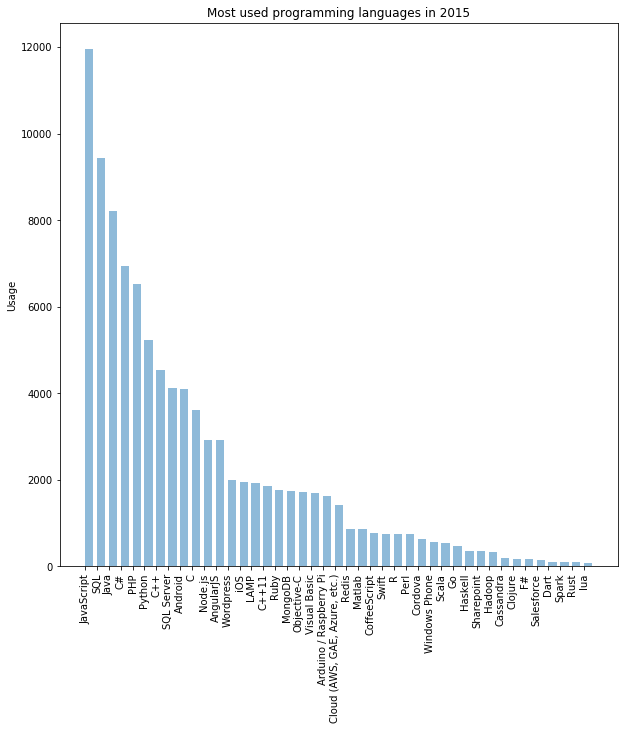

In [16]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2015['Programming Language'], df_2015['Users Count'],
                              90,'Usage','Most used programming languages in 2015',10,10)

## 2016 dataset
2016 dataset is a much simpler one with little cleaning to do.

In [17]:
pl_2016 = data_2016['tech_do']
#drop nan values as they are not needed.
pl_2016.dropna(inplace=True)

#Getting the count
pl_2016_counter = defaultdict(int)
for st in pl_2016:
    row = st.split(';')
    for subst in row:
        pl_2016_counter[subst.strip()]+=1

df_2016 = pd.DataFrame(list(pl_2016_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2016.reset_index(drop=True,inplace=True)
display(df_2016)

,Programming Language,Users Count
0,JavaScript,27385
1,SQL,21976
2,Java,17942
3,C#,15283
4,PHP,12780
5,Python,12282
6,C++,9589
7,SQL Server,9306
8,AngularJS,8823
9,Android,8601


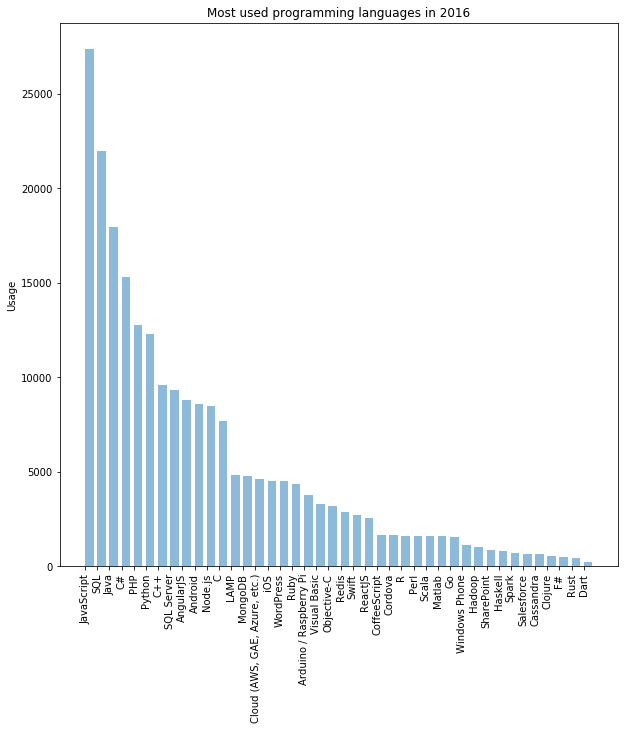

In [18]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2016['Programming Language'], df_2016['Users Count'],
                              90,'Usage','Most used programming languages in 2016',10,10)

## 2017 dataset
Again, a simple one.

In [19]:
#2017 dataset
pl_2017 = data_2017['HaveWorkedLanguage']
pl_2017.dropna(inplace=True)
pl_2017_counter = defaultdict(int)
for st in pl_2017:
    row = st.split(';')
    for subst in row:
        pl_2017_counter[subst.strip()]+=1

df_2017 = pd.DataFrame(list(pl_2017_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2017.reset_index(drop=True,inplace=True)
display(df_2017)

,Programming Language,Users Count
0,JavaScript,22875
1,SQL,18754
2,Java,14524
3,C#,12476
4,Python,11704
5,PHP,10290
6,C++,8155
7,C,6974
8,TypeScript,3488
9,Ruby,3324


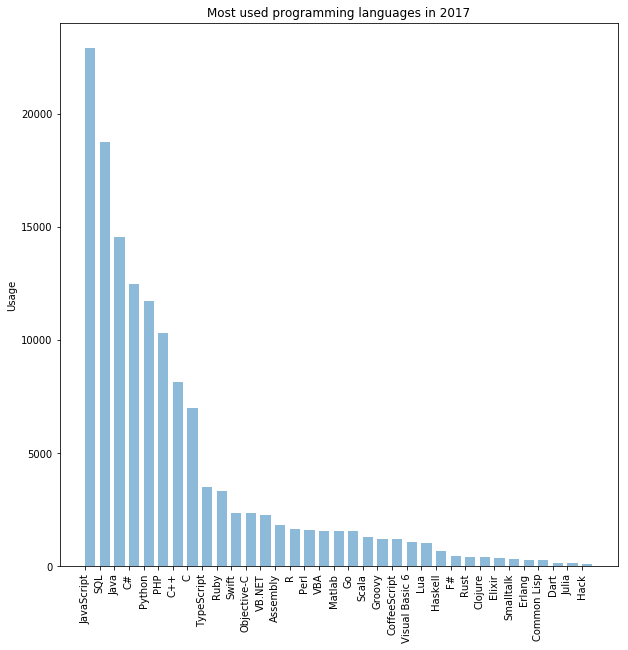

In [20]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2017['Programming Language'], df_2017['Users Count'],
                              90,'Usage','Most used programming languages in 2017',10,10)

## 2018 dataset
from 2017 to 2019, the steps are almost the same.

In [21]:
#2018 dataset
pl_2018 = data_2018['LanguageWorkedWith']
pl_2018.dropna(inplace=True)
pl_2018_counter = defaultdict(int)
for st in pl_2018:
    row = st.split(';')
    for subst in row:
        pl_2018_counter[subst.strip()]+=1
        
df_2018 = pd.DataFrame(list(pl_2018_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2018.reset_index(drop=True,inplace=True)
display(df_2018)

,Programming Language,Users Count
0,JavaScript,54686
1,HTML,53628
2,CSS,50979
3,SQL,44670
4,Java,35521
5,Bash/Shell,31172
6,Python,30359
7,C#,26954
8,PHP,24071
9,C++,19872


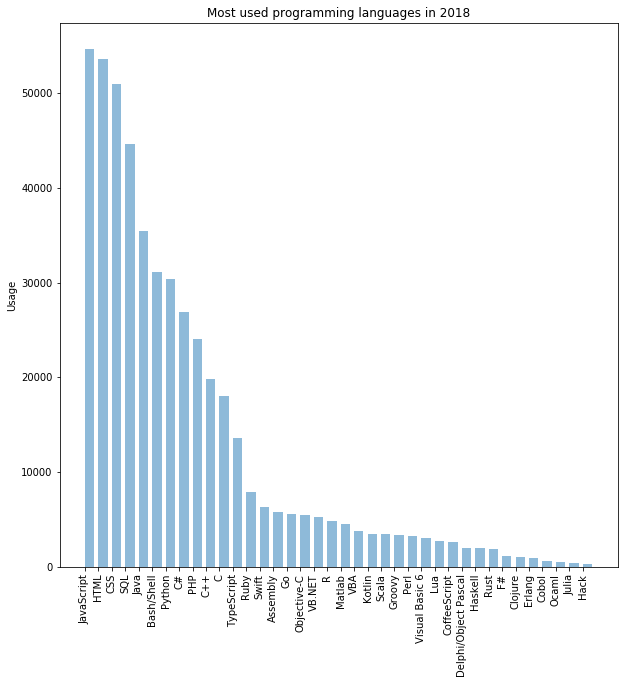

In [22]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2018['Programming Language'], df_2018['Users Count'],
                              90,'Usage','Most used programming languages in 2018',10,10)

## 2019 dataset


In [23]:
#2019 dataset
pl_2019 = data_2019['LanguageWorkedWith']
pl_2019.dropna(inplace=True)
pl_2019_counter = defaultdict(int)
for st in pl_2019:
    row = st.split(';')
    for subst in row:
        pl_2019_counter[subst.strip()]+=1
df_2019 = pd.DataFrame(list(pl_2019_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2019.reset_index(drop=True,inplace=True)
display(df_2019)

,Programming Language,Users Count
0,JavaScript,59219
1,HTML/CSS,55466
2,SQL,47544
3,Python,36443
4,Java,35917
5,Bash/Shell/PowerShell,31991
6,C#,27097
7,PHP,23030
8,C++,20524
9,TypeScript,18523


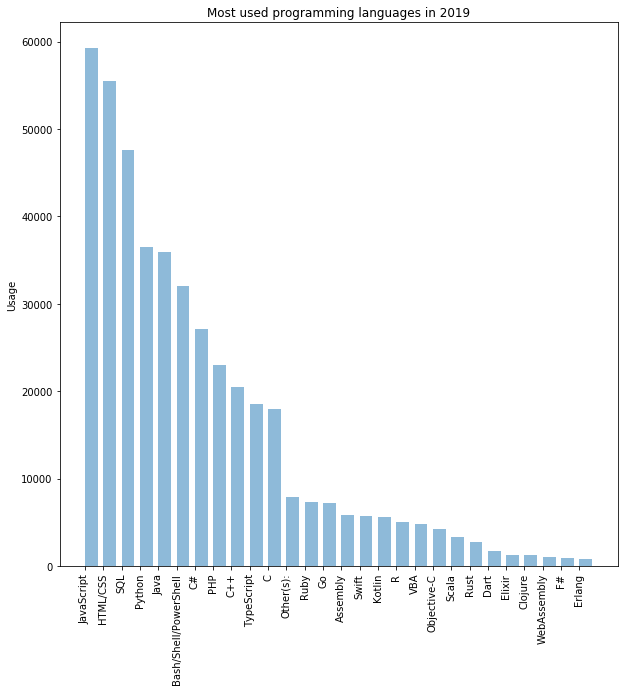

In [24]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2019['Programming Language'], df_2019['Users Count'],
                              90,'Usage','Most used programming languages in 2019',10,10)

# Conclusion
Clearly __JavaScript__ is the __\#1__ most used programming language over the years followed by SQL (We can honestly drop the HTML/CSS part) but notice that __Python__ is on the rise, getting higher and higher each year...is it because of the sudden Data Science and Machine Learning trend ?

## What do you think is the reason JavaScript and SQL are widely used like that ? and what languages do you expect to become more popular in the next few years ?